In [1]:
# Project 2 Code

import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Load data into a dataframe and look at the data.

data = pd.read_csv("StudentsPerformance.csv")
data.head()

# The data from the student exam performance csv has been loaded in.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Check the dimension of the table.
print("The dimension of the table is: ", data.shape)

# The dimension of the table is (1000, 8).

The dimension of the table is:  (1000, 8)


In [4]:
# Removing punctuation (apostrophes) from the paerntal level of education variable.

data['parental level of education'] = data['parental level of education'].replace("bachelor's degree", "bachelors degree").replace("master's degree", "masters degree").replace("associate's degree", "associates degree")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelors degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,masters degree,standard,none,90,95,93
3,male,group A,associates degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Running some initial summary and descriptive statistics of the data.

print("Describe Data")
print(data.describe())
print("")
print("")
print("")
print("")
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000




Summarized Data
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test preparation course  
count                     1000  
unique                       2  
top                       none  
freq                       642  


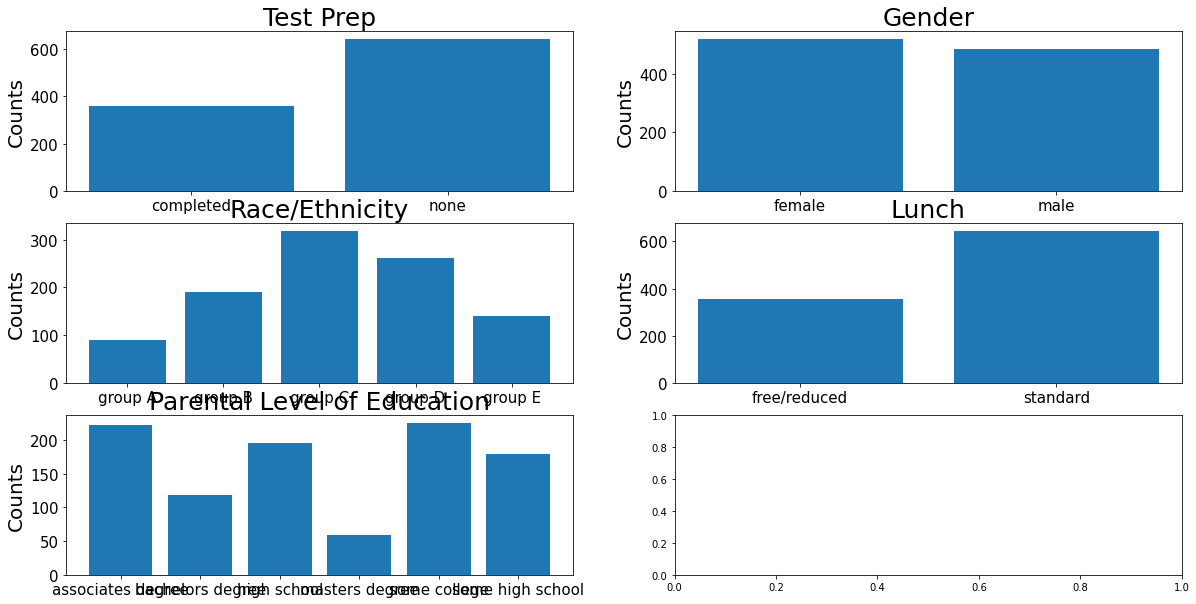

In [6]:
# Season and Sex only have 2 options, so they are represented in bar charts. There are 4 options for medals.

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# make the data read to feed into the visulizer
X_prep = data.replace({'test preparation course': {1: 'Completed', 0: 'None'}}).groupby('test preparation course').size().reset_index(name='Counts')['test preparation course']
Y_prep = data.replace({'test preparation course': {1: 'Completed', 0: 'None'}}).groupby('test preparation course').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 0].bar(X_prep, Y_prep)
axes[0, 0].set_title('Test Prep', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_gender = data.groupby('gender').size().reset_index(name='Counts')['gender']
Y_gender = data.groupby('gender').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_gender, Y_gender)
axes[0, 1].set_title('Gender', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_lunch = data.groupby('lunch').size().reset_index(name='Counts')['lunch']
Y_lunch = data.groupby('lunch').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 1].bar(X_lunch, Y_lunch)
axes[1, 1].set_title('Lunch', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_race = data.replace({'race/ethnicity': {1: 'group A', 2: 'group B', 3: 'group C', 4: 'group D', 5: 'group E'}}).groupby('race/ethnicity').size().reset_index(name='Counts')['race/ethnicity']
Y_race = data.replace({'race/ethnicity': {1: 'group A', 2: 'group B', 3: 'group C', 4: 'group D', 5: 'group E'}}).groupby('race/ethnicity').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 0].bar(X_race, Y_race)
axes[1, 0].set_title('Race/Ethnicity', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
#X_parent_education = data.replace({'parental level of education': {1: 'some high school', 2: 'high school' 3: 'some college', 4: 'associates degree', 5: 'bachelors degree', 6: 'masters degree'}}).groupby('parental level of education').size().reset_index(name='Counts')['parental level of education']
#Y_parent_education = data.replace({'parental level of education': {1: 'some high school', 2: 'high school' 3: 'some college', 4: 'associates degree', 5: 'bachelors degree', 6: 'masters degree'}}).groupby('parental level of education').size().reset_index(name='Counts')['Counts']

# make the bar plot
#axes[2, 0].bar(X_parent_education, Y_parent_education)
#axes[2, 0].set_title('Parental Level of Education', fontsize=25)
#axes[2, 0].set_ylabel('Counts', fontsize=20)
#axes[2, 0].tick_params(axis='both', labelsize=15)

X_parent_education = data.replace({'parental level of education': {1: 'some high school', 2: 'high school', 3: 'some college', 4: 'associates degree', 5: 'bachelors degree', 6: 'masters degree'}}).groupby('parental level of education').size().reset_index(name='Counts')['parental level of education']
Y_parent_education = data.replace({'parental level of education': {1: 'some high school', 2: 'high school', 3: 'some college', 4: 'associates degree', 5: 'bachelors degree', 6: 'masters degree'}}).groupby('parental level of education').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[2, 0].bar(X_parent_education, Y_parent_education)
axes[2, 0].set_title('Parental Level of Education', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)

In [7]:
# For the feature selection process, we will not be removing any fields. Every field is unique and represents a different factor
# that could impact the test scores. We will run our model and evaluate the viable fields at that point, however, we will want
# them all included at this time. Based off of the bar charts, there is no missing data in our dataset amd therefore we do not
# need to address any NAs or NaNs that might have appeared.

In [8]:
# Creating our Model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score

In [9]:
# Convert categorical data to numbers using dummies
group = pd.get_dummies(data['race/ethnicity'],drop_first=True)
education = pd.get_dummies(data['parental level of education'],drop_first=True)
lunch = pd.get_dummies(data['lunch'],drop_first=True)
course = pd.get_dummies(data['test preparation course'],drop_first=True)

data = pd.concat([data,group,education,lunch,course],axis=1)
data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1,inplace=True)

In [10]:
#from sklearn.preprocessing import StandardScaler

# Importing StandardScaler, which will help standardize features by removing the mean and scaling to unit variance
#scaler = StandardScaler()
#data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [11]:
# Creating a whole features dataset that can be used for train and validation data splitting
data_model_x = data[['group B','group C','group D','group E','bachelors degree','high school',
                          'masters degree','some college','some high school','standard','none']]

# Creating a whole target dataset that can be used for train and validation data splitting
data['three_test_avg'] = (data['math score']+data['reading score']+data['writing score'])/3
data_model_y = data['three_test_avg']

# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# Splitting the data between testing and training sets
x_train, x_test, y_train, y_test = train_test_split(data_model_x, data_model_y, test_size =0.15, random_state=11)

# Number of samples in each set
print("No. of samples in training set: ", x_train.shape[0])
print("No. of samples in validation set:", x_test.shape[0])

No. of samples in training set:  850
No. of samples in validation set: 150


<AxesSubplot:>

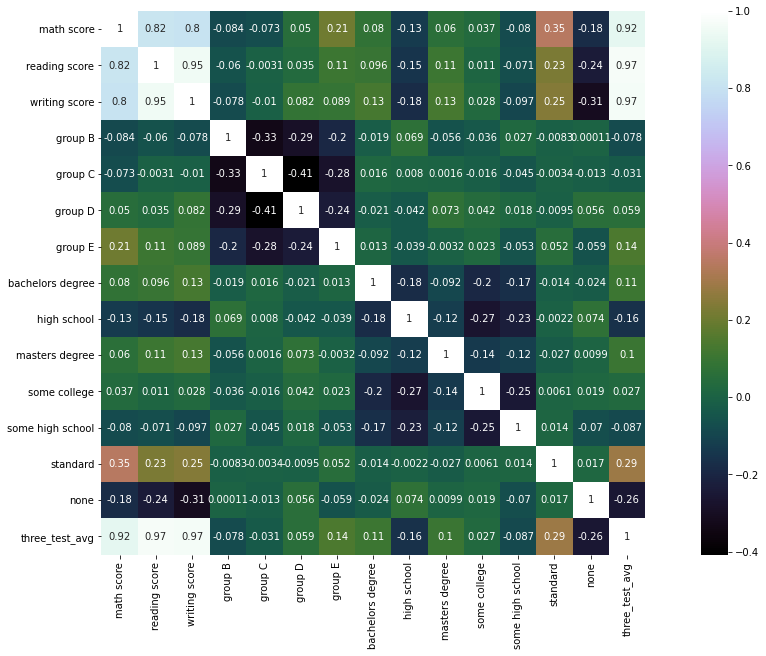

In [12]:
# Looking at correlations
import seaborn as sns
corr_mat=data.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [13]:
# Creating a linear regression model (multivariate)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Fitting the model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predicting results for the test set
predicted_results = regr.predict(x_test)

# Creating accuracy metrics for the model
print('Mean Squared Error:',(mean_squared_error(y_test, predicted_results)))
print('Mean Absolute Error:', round(np.mean(abs(predicted_results - y_test)), 2))
print('Root Mean Absolute Error:',(np.sqrt(mean_squared_error(y_test, predicted_results))))
print('R^2:',r2_score(y_test, predicted_results))

Mean Squared Error: 138.52943780626026
Mean Absolute Error: 9.89
Root Mean Absolute Error: 11.76985292203179
R^2: 0.21609682266560493


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Importing and training a random forest regressor with 1000 forests
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)

# Predicting results for the test set
predicted_results_rf = rf.predict(x_test)

# Creating accuracy metrics for the model
print('Mean Squared Error:',(mean_squared_error(y_test, predicted_results_rf)))
print('Mean Absolute Error:', round(np.mean(abs(predicted_results_rf - y_test)), 2))
print('Root Mean Absolute Error:',(np.sqrt(mean_squared_error(y_test, predicted_results_rf))))
print('R^2:',r2_score(y_test, predicted_results_rf))

Mean Squared Error: 180.021452284709
Mean Absolute Error: 11.16
Root Mean Absolute Error: 13.41720732062783
R^2: -0.018696030743281522


In [16]:
from sklearn.ensemble import ExtraTreesRegressor as etr

# Training the ETR model with 1000 trees
etr1 = etr(n_estimators=1000).fit(x_train, y_train)

predicted_results_etr = etr1.predict(x_test)

# Creating accuracy metrics for the model
print('Mean Squared Error:',(mean_squared_error(y_test, predicted_results_etr)))
print('Mean Absolute Error:', round(np.mean(abs(predicted_results_etr - y_test)), 2))
print('Root Mean Absolute Error:',(np.sqrt(mean_squared_error(y_test, predicted_results_etr))))
print('R^2:',r2_score(y_test, predicted_results_etr))

Mean Squared Error: 197.19733286095484
Mean Absolute Error: 11.49
Root Mean Absolute Error: 14.04269678021123
R^2: -0.1158900103800542


In [17]:
# Creating a whole target dataset that can be used for train and validation data splitting
data['three_test_perc'] = (data['math score']+data['reading score']+data['writing score'])/300
data_model_y = np.where(data['three_test_perc']<0.6,1,0)

# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# Splitting the data between testing and training sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(data_model_x, data_model_y, test_size =0.15, random_state=11)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear',class_weight='balanced')

model.fit(x_train_2, y_train_2)

predictions = model.predict(x_test)
difference = abs(predictions - y_test_2)
difference.mean()

0.30666666666666664

In [19]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_2,predictions))
cf_matrix = confusion_matrix(y_test_2,predictions)

[[74 37]
 [ 9 30]]


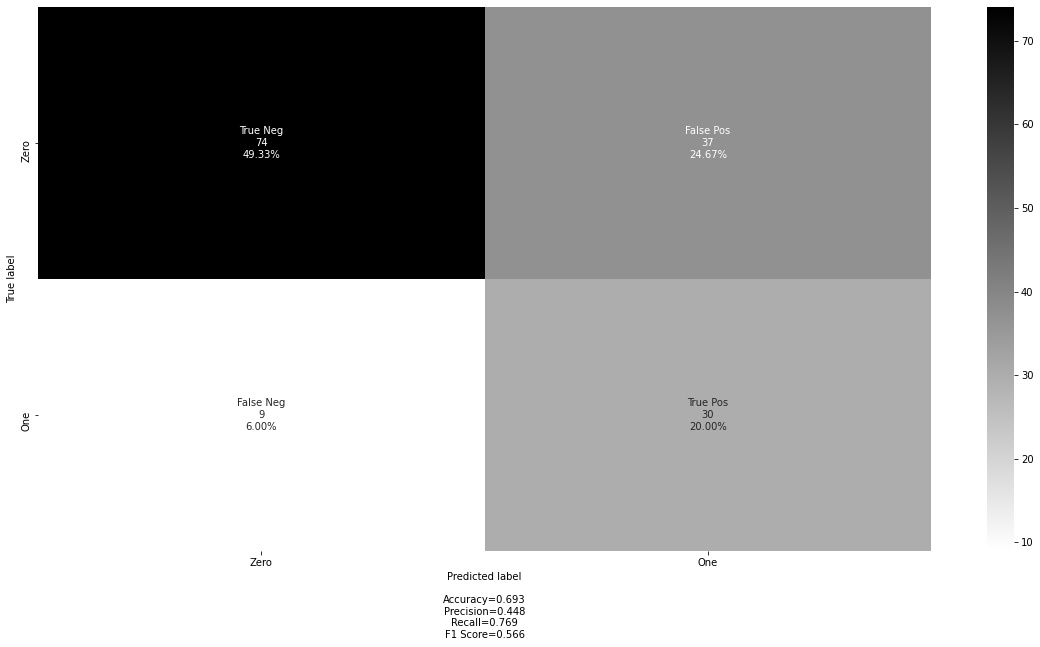

In [20]:
from cf_matrix import make_confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')